In [1]:
import sys
import yaml

from torchvision import datasets, transforms

sys.path.append('../src')
sys.path.append('../../../utils')
from simple_cnn import SimpleCnn
from train_utils import Trainer


In [2]:

with open('../configs/train_config.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

# Load dataset.
train_dataset = datasets.FashionMNIST(root='../../../data/fashion_mnist',
                                train=True,
                                transform=transforms.ToTensor(),
                                download=True)

# Load model.
model = SimpleCnn()
trainer = Trainer(model, train_dataset, config)
result = trainer.train()

100%|██████████| 10/10 [01:09<00:00,  6.92s/it]


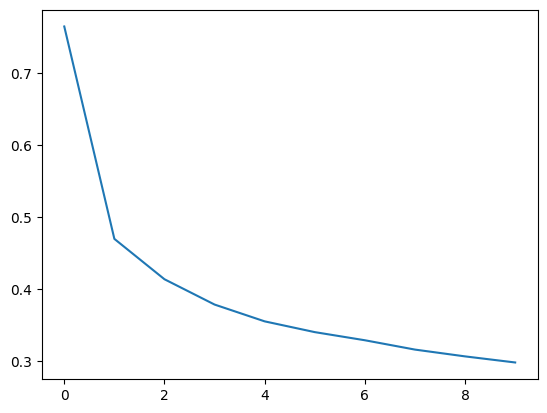

In [3]:
import matplotlib.pyplot as plt

plt.plot(result['loss_history'])